In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from google.colab import files


#Calling Dataset and Pre processing

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nayeem01/oxygen_level_prediction_sarima/master/data.csv')

In [ ]:
df0=df
df_mean = df0.mean()
df=df0.replace(np.nan, df_mean)
df

,date,time,temp,spcond (ms/cm),ph,Ox,do_persent,turbidity,chlorophyll,phycocyanin,sysbattery
0,5/11/2017,16:30:00,14.86,0.82,7.06,8.23,81.57,1.84,1.13,0.31,12.69
1,5/11/2017,16:45:00,14.89,0.82,7.06,8.23,81.66,1.81,1.12,0.29,12.56
2,5/11/2017,17:00:00,14.89,0.82,7.08,8.26,81.94,1.84,1.28,0.30,12.33
3,5/11/2017,17:15:00,14.79,0.82,7.10,8.23,81.39,1.93,1.22,0.31,12.27
4,5/11/2017,17:30:00,14.86,0.82,7.11,8.28,82.08,1.77,1.14,0.32,12.19
...,...,...,...,...,...,...,...,...,...,...,...
11853,10/31/2017,21:15:00,14.85,1.56,7.33,8.47,84.14,4.94,1.53,0.67,10.01
11854,10/31/2017,21:30:00,14.82,1.56,7.33,8.46,83.98,5.11,1.84,0.68,9.87
11855,10/31/2017,21:45:00,14.81,1.56,7.33,8.47,84.07,4.99,1.79,0.71,9.64
11856,10/31/2017,22:00:00,14.82,1.56,7.32,8.45,83.86,4.76,1.89,0.73,9.32


In [ ]:
df.describe()

,temp,spcond (ms/cm),ph,Ox,do_persent,turbidity,chlorophyll,phycocyanin,sysbattery
count,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000
mean,20.941906,1.510206,7.860956,9.126104,102.881943,2.449129,2.076148,0.940625,12.253828
std,3.233775,0.558131,0.562303,1.510925,19.087482,3.549913,1.057412,0.673713,0.544124
min,13.420000,0.690000,6.820000,5.580000,58.430000,-1.630000,0.630000,0.140000,6.500000
25%,18.490000,0.990000,7.330000,8.170000,88.790000,1.840000,1.410000,0.470000,12.030000
50%,21.060000,1.590000,7.870000,9.250000,103.860000,2.220000,1.790000,0.850000,12.320000
75%,23.720000,2.000000,8.300000,10.100000,114.450000,2.740000,2.360000,1.190000,12.550000
max,28.830000,2.560000,9.390000,14.390000,174.310000,279.660000,14.670000,10.890000,13.560000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            11858 non-null  object 
 1   time            11858 non-null  object 
 2   temp            11858 non-null  float64
 3   spcond (ms/cm)  11858 non-null  float64
 4   ph              11858 non-null  float64
 5   Ox              11858 non-null  float64
 6   do_persent      11858 non-null  float64
 7   turbidity       11858 non-null  float64
 8   chlorophyll     11858 non-null  float64
 9   phycocyanin     11858 non-null  float64
 10  sysbattery      11858 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1019.2+ KB


In [ ]:
df1=df.drop(['date','time'],axis=1)
df_mean = df1.mean()
df=df1.replace(np.nan, df_mean)
df

,temp,spcond (ms/cm),ph,Ox,do_persent,turbidity,chlorophyll,phycocyanin,sysbattery
0,14.86,0.82,7.06,8.23,81.57,1.84,1.13,0.31,12.69
1,14.89,0.82,7.06,8.23,81.66,1.81,1.12,0.29,12.56
2,14.89,0.82,7.08,8.26,81.94,1.84,1.28,0.30,12.33
3,14.79,0.82,7.10,8.23,81.39,1.93,1.22,0.31,12.27
4,14.86,0.82,7.11,8.28,82.08,1.77,1.14,0.32,12.19
...,...,...,...,...,...,...,...,...,...
11853,14.85,1.56,7.33,8.47,84.14,4.94,1.53,0.67,10.01
11854,14.82,1.56,7.33,8.46,83.98,5.11,1.84,0.68,9.87
11855,14.81,1.56,7.33,8.47,84.07,4.99,1.79,0.71,9.64
11856,14.82,1.56,7.32,8.45,83.86,4.76,1.89,0.73,9.32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            11858 non-null  float64
 1   spcond (ms/cm)  11858 non-null  float64
 2   ph              11858 non-null  float64
 3   Ox              11858 non-null  float64
 4   do_persent      11858 non-null  float64
 5   turbidity       11858 non-null  float64
 6   chlorophyll     11858 non-null  float64
 7   phycocyanin     11858 non-null  float64
 8   sysbattery      11858 non-null  float64
dtypes: float64(9)
memory usage: 833.9 KB


In [ ]:
print(df.columns.values)

['temp ' 'spcond (ms/cm)' 'ph' 'Ox' 'do_persent' 'turbidity '
 'chlorophyll ' 'phycocyanin ' 'sysbattery']


#Correletaion between elements

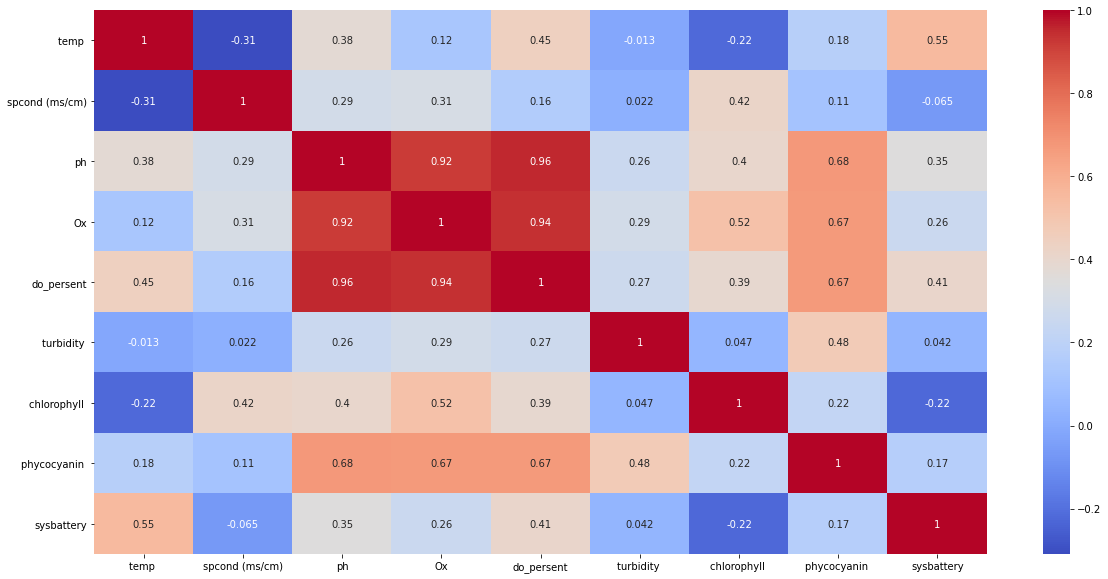

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

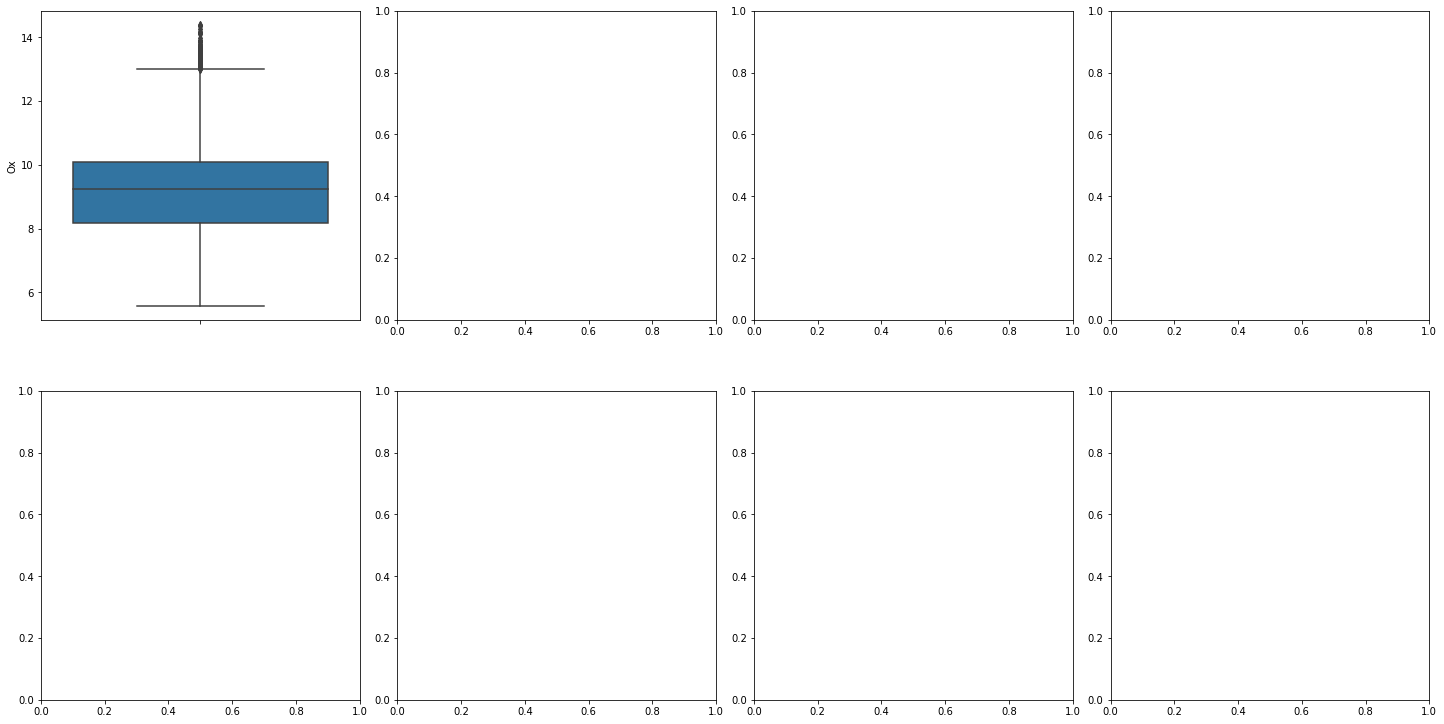

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in df.items():
    if col != 'ph':
        sns.boxplot(y='Ox', data=df, ax=ax[index])
        break
        index += 1
        
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
pip install mglearn


     |████████████████████████████████| 542kB 4.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=7761dbe6551fe08277c08a56e26a0c306a29180837b53c295dc2c0f1511c8bf6
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import mglearn 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
ph = df[['ph']]
ox = df[['Ox']]
from sklearn.model_selection import train_test_split
X = ph
y = ox
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train

,ph
7956,7.24
536,7.14
876,7.09
3706,8.15
1735,6.91
...,...
7813,7.21
10955,8.40
905,7.04
5192,7.80


In [ ]:
X_test

,ph
7156,8.77
941,7.07
10204,7.78
10011,7.70
6007,7.90
...,...
11249,8.15
9524,8.11
6233,8.06
7248,8.58


In [ ]:
y_train

,Ox
7956,6.75
536,8.64
876,7.96
3706,9.55
1735,6.01
...,...
7813,6.86
10955,11.18
905,7.76
5192,8.47


In [ ]:
y_test

,Ox
7156,11.82
941,7.69
10204,9.17
10011,8.67
6007,9.40
...,...
11249,10.13
9524,9.81
6233,9.81
7248,11.02


In [ ]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    # Make point predictions on the test set using the fit model.
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

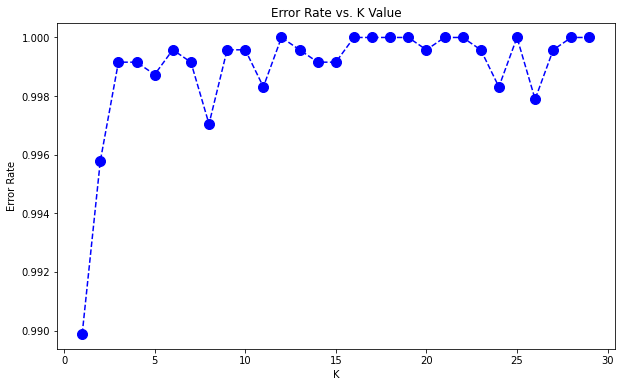

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
files.download('plot2.png')


In [ ]:
#when k=5 

# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(ph,ox)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# Make point predictions on the test set using the fit model.
knn.predict([[7.14]])

array([[8.564]])

In [ ]:
test = pd.read_csv("/content/sample_data/test.csv")
test.head(5)

,ph
0,6.98
1,6.83
2,6.88
3,6.61


In [ ]:
p = knn.predict(test)
p

array([[6.64 ],
       [5.698],
       [6.284],
       [5.698]])

In [ ]:
accuracy = knn.score(X_test, y_test)
print (accuracy)
print(accuracy*100)

0.8780604169842506
87.80604169842506


In [ ]:
predictions

array([[11.23068966],
       [ 7.68275862],
       [ 9.11965517],
       ...,
       [ 9.58931034],
       [11.01482759],
       [11.05551724]])

In [ ]:
#when k=17 

# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=17)
# Fit the model on the training data.
knn.fit(ph,ox)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')

In [ ]:
# Make point predictions on the test set using the fit model.
knn.predict([[7.14]])

array([[8.43647059]])

In [ ]:
p1 = knn.predict(test)
p1

array([[6.76823529],
       [5.80823529],
       [5.99235294],
       [5.80823529]])

In [ ]:
accuracy = knn.score(X_test, y_test)
print (accuracy)
print(accuracy*100)

0.8965059000332931
89.65059000332931


In [ ]:
#when k=30 

# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=30)
# Fit the model on the training data.
knn.fit(ph,ox)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform')

In [ ]:
# Make point predictions on the test set using the fit model.
knn.predict([[7.14]])

array([[8.36333333]])

In [ ]:
p1 = knn.predict(test)
p1

array([[6.78866667],
       [5.885     ],
       [6.11233333],
       [5.885     ]])

In [ ]:
accuracy = knn.score(X_test, y_test)
print (accuracy)
print(accuracy*100)

0.9022159131896789
90.22159131896788


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

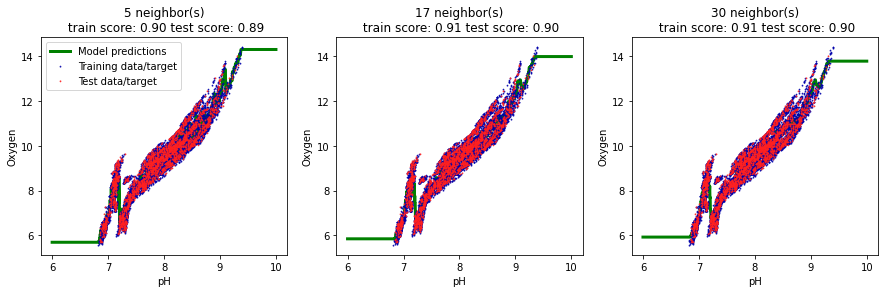

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between 6 and 10
line = np.linspace(6, 10, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([5, 17, 30], axes):
    # make predictions using 5, 17, or 30 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line),color='green', linewidth=3)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=1)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=1)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("pH")
    ax.set_ylabel("Oxygen")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
files.download('plot1.png')

#Cross Validation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

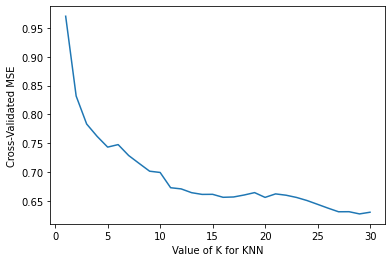

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    loss = abs(cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.savefig('plot0.png', dpi=300, bbox_inches='tight')
files.download('plot0.png')
plt.show()

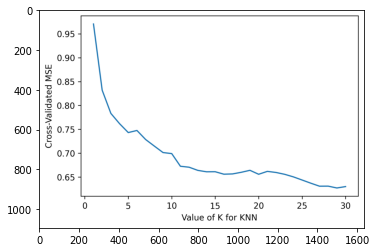

In [ ]:
# importing matplotlib modules
import matplotlib.image as mpimg
  
# Read Images
img = mpimg.imread('plot0.png')
  
# Output Images
plt.imshow(img)